In [12]:
import pickle
objectRep = open("FID_cont_result_dict.pkl", "rb")
fid = pickle.load(objectRep)

In [16]:
fid.keys()


dict_keys(['mnist_adv_flowgan_marin1', 'mnist_hybrid_ckpt1', 'mnist_mle_ckpt1'])

{'mnist_adv_flowgan_marin1': [243.38953034854455,
  199.7675933457664,
  128.99229330767764,
  127.12710202986469,
  94.4577043640069,
  146.70009877375475,
  93.68744068396342,
  101.77867381909951,
  110.27113565080882,
  78.00897788050469,
  108.7490764244429,
  106.60087742329367,
  91.93709525496334,
  78.11725395680804,
  101.52883137358856,
  120.77309100110011,
  86.99968589142884,
  112.9532839183818,
  126.60384050412097,
  98.44190658422315,
  99.76856435297029,
  93.65388254354718,
  92.56893784506605,
  103.78410798129343,
  117.71798244057257,
  107.98711522071358,
  110.12643136536289,
  113.66256684174118,
  101.89906939983453,
  90.09872948800961,
  93.70903173493659,
  86.4866527060542,
  126.63037402315027,
  105.86502861748315,
  86.31645852580823,
  87.13440360027869,
  100.63347726210762,
  98.89029425695392,
  108.03796448348459,
  98.43535737805385,
  95.30079824736578,
  122.81626400957293,
  102.11942769901933,
  130.37999124024094,
  105.55924232522344,
  104

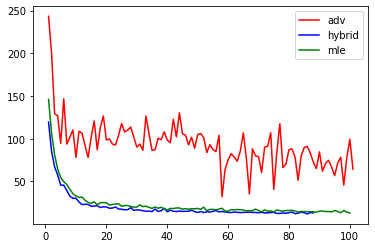

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# red dashes, blue squares and green triangles
plt.plot(range(1,len(fid['mnist_adv_flowgan_marin1'])+1), fid['mnist_adv_flowgan_marin1'], 'r',label='adv')
plt.plot(range(1,len(fid['mnist_hybrid_ckpt1'])+1), fid['mnist_hybrid_ckpt1'], 'b', label='hybrid')
plt.plot(range(1,len(fid['mnist_mle_ckpt1'])+1), fid['mnist_mle_ckpt1'], 'g', label='mle')
plt.legend()
plt.show()

In [65]:
import glob
import imageio
import os
filenames = glob.glob('./final_images_for_gif/cifar_adv/*.png')
#print(filenames)
filenames.sort()
images = []
#filenames.sort(key = lambda x: int(os.path.basename('./cifar_adv_sample/fake_samples_epoch_000018.png').split('.')[0].split('_')[-1]))
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./final_images_for_gif/cifar_adv/all_images.gif', images)

In [47]:
from models import RealNVP, RealNVPLoss
import torchvision,torch

In [63]:
filenames = glob.glob('./cifar_adv_ckpt/*netG*.pth')
filenames.sort(key = lambda x: int(os.path.basename(x).split('.')[0].split('_')[-1]))
#filenames

#cifar_adv_ckpt
# cifar_mle_ckpt
#cifar_mle_sample


In [64]:
device = 'cuda'

z = torch.randn((25, 3, 32, 32)).to(device)
netG = RealNVP(num_scales=2, in_channels=3, mid_channels=64, num_blocks=8).to(device)
for epoch, filename in enumerate(filenames):
    netG.load_state_dict(torch.load(filename))
    with torch.no_grad():
        x, _ = netG(z, reverse=True)
        fake = torch.sigmoid(x)
        torchvision.utils.save_image(fake.detach(),
                    './final_images_for_gif/cifar_adv/fake_samples_epoch_%06d.png' % (epoch), 
                                 nrow=5, 
                    normalize=True)

In [12]:
int(os.path.basename('./cifar_adv_sample/fake_samples_epoch_000018.png').split('.')[0].split('_')[-1])

18